<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab: Fun with Neural Nets

---

Below is a procedure for building a neural network to recognize handwritten digits.  The data is from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data), and you will submit your results to Kaggle to test how well you did!

1. Load the training data (`train.csv`) from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data)
2. Setup X and y (feature matrix and target vector)
3. Split X and y into train and test subsets.
4. Preprocess your data

   - When dealing with image data, you need to normalize your `X` by dividing each value by the max value of a pixel (255).
   - Since this is a multiclass classification problem, keras needs `y` to be a one-hot encoded matrix
   
5. Create your network.
   - Remember that for multi-class classification you need a softmax activation function on the output layer.
   - You may want to consider using regularization or dropout to improve performance.
   
6. Train your network.
7. If you are unhappy with your model performance, try to tighten up your model by adding hidden layers, adding hidden layer units, chaining the activation functions on the hidden layers, etc.
8. Load in [Kaggle's](https://www.kaggle.com/c/digit-recognizer/data) `test.csv`
9. Create your predictions (these should be numbers in the range 0-9).
10. Save your predictions and submit them to Kaggle.

---

For this lab, you should complete the above sequence of steps for **_at least_** two of the four "configurations":

1. Using a `tensorflow` network (we did _not_ cover this in class!)
2. Using a `keras` convolutional network
3. Using a `keras` network with regularization
4. Using a `tensorflow` convolutional network (we did _not_ cover this in class!)

In [1]:
# Import
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import opendatasets as od

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, \
Conv2D, MaxPooling2D
from tensorflow.keras import utils

In [2]:
# Download dataset form kaggle
# od.download("https://www.kaggle.com/competitions/digit-recognizer/data")

In [3]:
# Read dataset 
df_train = pd.read_csv("./digit-recognizer/train.csv")
df_test = pd.read_csv("./digit-recognizer/test.csv")
df_submission = pd.read_csv("./digit-recognizer/sample_submission.csv")

In [4]:
# View 5 top rows 
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# View 5 top rows 
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(f"Shape of training dataset: {df_train.shape}")
print(f"Shape of testing dataset: {df_test.shape}")

Shape of training dataset: (42000, 785)
Shape of testing dataset: (28000, 784)


In [7]:
print(f"Missing value of training dataset: {(df_train.isnull().sum() !=0).sum()}")
print(f"Missing value of testing dataset: {(df_test.isnull().sum() !=0).sum()}")

Missing value of training dataset: 0
Missing value of testing dataset: 0


In [8]:
# Check target
df_train["label"].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

---

## Prepare data

In [9]:
# Change dataframe to numpy value
train = df_train.drop('label',axis=1).to_numpy()
test = df_test.to_numpy()

In [10]:
# Check one value 
train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [11]:
# Change type to float 
# (Otherwise, we get an error)
# For scale our data to be betwen 0 and 1
train = train.astype('float32')
test = test.astype('float32')

In [12]:
# Current range of data is 0 to 255
# This scales each value to be between 0 and 1
train /= 255.0
test /= 255.0

In [13]:
# Recheck after scales data
print(train.min())
print(train.max())

0.0
1.0


In [14]:
# Check shape of full training data
train.shape

(42000, 784)

In [15]:
# Reshape each image to be 28 x 28 x 1
# The 1 corresponds to the one black/white value
# If we had a color image, we would likely use 3 for RGB
train = train.reshape(train.shape[0], 28, 28, 1)
test = test.reshape(test.shape[0], 28, 28, 1)

In [16]:
# Recheck
train.shape

(42000, 28, 28, 1)

In [17]:
# Recheck
test.shape

(28000, 28, 28, 1)

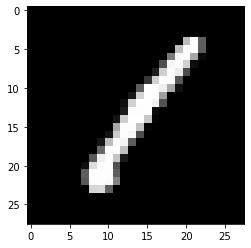

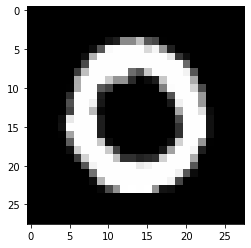

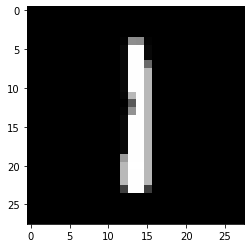

In [18]:
# Ploting some images  
plt.imshow(train[0,:],cmap="gray")
plt.show()
plt.imshow(train[1,:],cmap="gray")
plt.show()
plt.imshow(train[2,:],cmap="gray")
plt.show()

In [19]:
# Define X and y
X = train
y = df_train["label"].to_numpy()

In [20]:
# train test split training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2)

In [21]:
# Recheck shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (33600,), (8400,))

In [22]:
# Recheck target of each classes
pd.Series(y_train).value_counts(normalize=True).mul(100).round(2).sort_index()

0     9.66
1    11.20
2    10.03
3    10.43
4     9.72
5     8.98
6     9.88
7    10.50
8     9.57
9    10.03
dtype: float64

In [23]:
pd.Series(y_train).nunique()

10

In [24]:
# Change y_train
# Converts a class vector (integers) to binary class matrix.
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [25]:
# Check y_train
y_train[0:10]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

---

## Model training 

In [26]:
# Instantiating our model
model = Sequential()

# In order to "align" our neurons in a vertical array, we
# add a "Flatten" layer. This will be required before adding
# subsequent Dense layers. We need to specify the input shape.

model.add(Flatten(input_shape=(28,28,1)))

# Flattens the input. Does not affect the batch size.

# Let's create a fully-connected, feed-forward neural net with:
# - A 128-node hidden layer
# - A 32-node hidden layer
# - The appropriate output layer

model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

# fully-connected --> Dense
# outer layer - 10 class labels 
# multi-class challenge so `softmax` for activation


# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# categorical_crossentropy --> multi-class
# binary_crossentropy or `bce` --> binary classification

# Fit the model on the training data
history = model.fit(X_train,
                    y_train, 
                    batch_size=256,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    verbose=1)

Epoch 1/10
132/132 [==============================] - 1s 5ms/step - loss: 0.5985 - accuracy: 0.8312 - val_loss: 0.2872 - val_accuracy: 0.9132
Epoch 2/10
132/132 [==============================] - 0s 4ms/step - loss: 0.2280 - accuracy: 0.9358 - val_loss: 0.2138 - val_accuracy: 0.9352
Epoch 3/10
132/132 [==============================] - 0s 4ms/step - loss: 0.1683 - accuracy: 0.9521 - val_loss: 0.1734 - val_accuracy: 0.9458
Epoch 4/10
132/132 [==============================] - 0s 3ms/step - loss: 0.1328 - accuracy: 0.9619 - val_loss: 0.1521 - val_accuracy: 0.9524
Epoch 5/10
132/132 [==============================] - 0s 4ms/step - loss: 0.1071 - accuracy: 0.9695 - val_loss: 0.1384 - val_accuracy: 0.9571
Epoch 6/10
132/132 [==============================] - 0s 3ms/step - loss: 0.0886 - accuracy: 0.9742 - val_loss: 0.1331 - val_accuracy: 0.9600
Epoch 7/10
132/132 [==============================] - 0s 3ms/step - loss: 0.0735 - accuracy: 0.9791 - val_loss: 0.1324 - val_accuracy: 0.9564
Epoch 

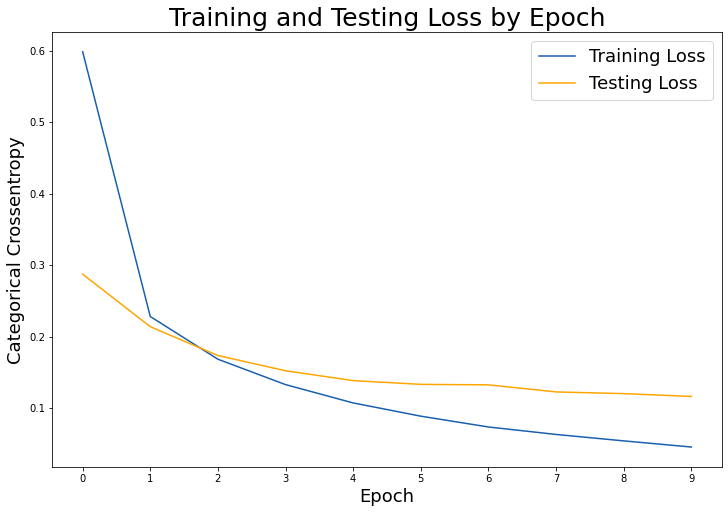

In [27]:
# Check out our train loss and test loss over epochs
train_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_labels = history.epoch

# Set figure size
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=18);

In [28]:
# Evaluate model on test data
score = model.evaluate(X_test,
                       y_test,
                       verbose=1)

# evaluate as a method:
# Returns the loss value & metrics values for the model in test mode.
# Computation is done in batches (see the `batch_size` arg.)

labels = model.metrics_names
# attribute called `metrics_names`

# Show model performance
print(f'{labels[0]}: {score[0]}')
print(f'{labels[1]}: {score[1]}')

263/263 [==============================] - 0s 1ms/step - loss: 0.1162 - accuracy: 0.9655
loss: 0.11621260643005371
accuracy: 0.9654762148857117


In [29]:
# Check out the model summary
model.summary()

# parameters == weights

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [30]:
# convolutional neural network 
# Instantiate a CNN
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=6, # number of fliter
                    kernel_size=(3,3), # height/width of fliter
                    activation="relu", # activation of function
                    input_shape=(28,28,1)))
                     
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(16, kernel_size=(3,3), activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation="relu"))
cnn_model.add(Dense(10, activation="softmax")) 

# Compile model
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [31]:
# Fit the model on the training data
history2 = cnn_model.fit(X_train, y_train,
                        batch_size=256,
                        validation_data=(X_test, y_test),
                        epochs=10,
                        verbose=1)

Epoch 1/10
132/132 [==============================] - 4s 27ms/step - loss: 0.5934 - accuracy: 0.8430 - val_loss: 0.2219 - val_accuracy: 0.9307
Epoch 2/10
132/132 [==============================] - 3s 25ms/step - loss: 0.1783 - accuracy: 0.9469 - val_loss: 0.1442 - val_accuracy: 0.9551
Epoch 3/10
132/132 [==============================] - 3s 24ms/step - loss: 0.1270 - accuracy: 0.9618 - val_loss: 0.1162 - val_accuracy: 0.9632
Epoch 4/10
132/132 [==============================] - 3s 24ms/step - loss: 0.1031 - accuracy: 0.9681 - val_loss: 0.1022 - val_accuracy: 0.9669
Epoch 5/10
132/132 [==============================] - 3s 25ms/step - loss: 0.0847 - accuracy: 0.9745 - val_loss: 0.0918 - val_accuracy: 0.9699
Epoch 6/10
132/132 [==============================] - 3s 25ms/step - loss: 0.0736 - accuracy: 0.9772 - val_loss: 0.0875 - val_accuracy: 0.9706
Epoch 7/10
132/132 [==============================] - 3s 25ms/step - loss: 0.0643 - accuracy: 0.9802 - val_loss: 0.0901 - val_accuracy: 0.9708

In [32]:
# Check out the model summary
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 128)              

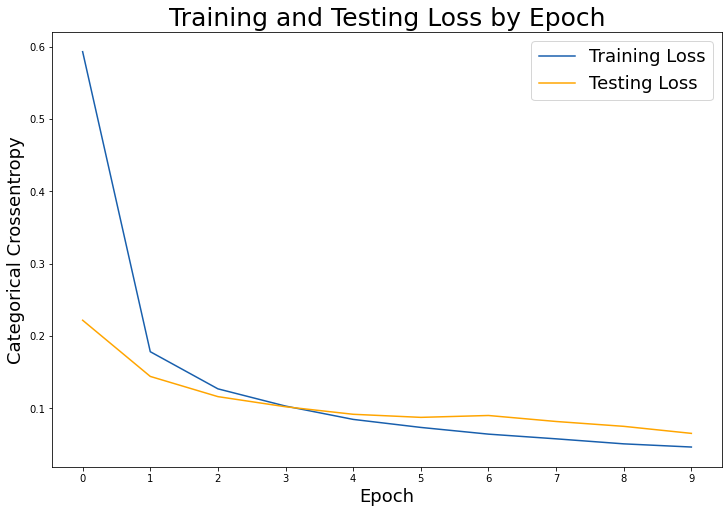

In [33]:
# Check out our train loss and test loss over epochs
train_loss = history2.history['loss']
test_loss = history2.history['val_loss']

# Set figure size
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(np.arange(10), np.arange(10))

plt.legend(fontsize = 18);

In [34]:
# Evaluate model on test data
cnn_score = cnn_model.evaluate(X_test,
                               y_test,
                               verbose=1)

cnn_labels = cnn_model.metrics_names

# Compare CNN and FFNN models
print(f'CNN {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN {cnn_labels[1]}   : {cnn_score[1]}')
print()
print(f'FFNN {labels[0]} : {score[0]}')
print(f'FFNN {labels[1]}  : {score[1]}')

263/263 [==============================] - 1s 3ms/step - loss: 0.0654 - accuracy: 0.9801
CNN loss  : 0.06537631154060364
CNN accuracy   : 0.9801190495491028

FFNN loss : 0.11621260643005371
FFNN accuracy  : 0.9654762148857117


In [35]:
# Instantiate a CNN
cnn_model_2 = Sequential()

# Add a convolutional layer
cnn_model_2.add(Conv2D(# number of filters
                       filters=16,
                       # height/width of filter
                       kernel_size=(3,3),
                       # activation function 
                       activation='relu',
                       # shape of input (image)
                       input_shape=(28,28,1)))

# Add a pooling layer
cnn_model_2.add(MaxPooling2D(pool_size=(2,2))) 
# dimensions of region of pooling

# Add another convolutional layer
cnn_model_2.add(Conv2D(64,
                       kernel_size=(3,3),
                       activation='relu'))

# Add another pooling layer
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))

# We have to remember to flatten to go from the 
# "box" to the vertical line of nodes!
cnn_model_2.add(Flatten())

# Add a densely-connected layer with 64 neurons
cnn_model_2.add(Dense(64, activation='relu'))

# Let's try to avoid overfitting!
cnn_model_2.add(Dropout(0.5))

# Add a densely-connected layer with 32 neurons
cnn_model_2.add(Dense(32, activation='relu'))

# Let's try to avoid overfitting!
cnn_model_2.add(Dropout(0.5))

# Add a final layer with 10 neurons.
cnn_model_2.add(Dense(10, activation='softmax'))


# Everythings above is 'structure'


# Compile model
cnn_model_2.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

# Fit model on training data
history3 = cnn_model_2.fit(X_train,
                          y_train,
                          batch_size=128,
                          validation_data=(X_test, y_test),
                          epochs=10,
                          verbose=1)

Epoch 1/10
263/263 [==============================] - 8s 27ms/step - loss: 1.1354 - accuracy: 0.6057 - val_loss: 0.2068 - val_accuracy: 0.9535
Epoch 2/10
263/263 [==============================] - 7s 26ms/step - loss: 0.4816 - accuracy: 0.8450 - val_loss: 0.1187 - val_accuracy: 0.9689
Epoch 3/10
263/263 [==============================] - 7s 26ms/step - loss: 0.3703 - accuracy: 0.8849 - val_loss: 0.0998 - val_accuracy: 0.9724
Epoch 4/10
263/263 [==============================] - 7s 26ms/step - loss: 0.3122 - accuracy: 0.9038 - val_loss: 0.0834 - val_accuracy: 0.9781
Epoch 5/10
263/263 [==============================] - 7s 26ms/step - loss: 0.2743 - accuracy: 0.9157 - val_loss: 0.0747 - val_accuracy: 0.9793
Epoch 6/10
263/263 [==============================] - 7s 26ms/step - loss: 0.2608 - accuracy: 0.9198 - val_loss: 0.0773 - val_accuracy: 0.9815
Epoch 7/10
263/263 [==============================] - 7s 26ms/step - loss: 0.2317 - accuracy: 0.9298 - val_loss: 0.0761 - val_accuracy: 0.9817

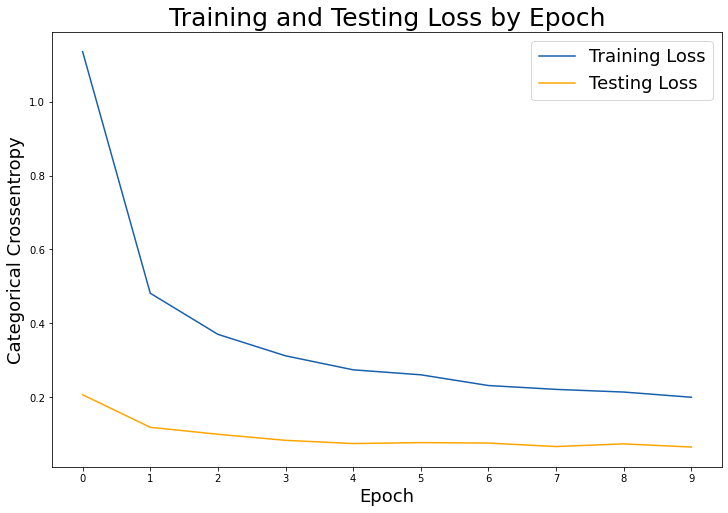

In [36]:
# Check out our train loss and test loss over epochs
train_loss = history3.history['loss']
test_loss = history3.history['val_loss']
epoch_labels = history.epoch

# Set figure size
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels) # (ticks, labels)

plt.legend(fontsize=18);

In [37]:
# Evaluate model on test data
cnn_model_2.summary()

cnn_2_score = cnn_model_2.evaluate(X_test,
                                   y_test,
                                   verbose=1)

cnn_2_labels = cnn_model_2.metrics_names

# Compare models
print(f'CNN 2 {cnn_2_labels[0]}: {cnn_2_score[0]}')
print(f'CNN 2 {cnn_2_labels[1]}: {cnn_2_score[1]}')
print()
print(f'CNN 1 {cnn_labels[0]}: {cnn_score[0]}')
print(f'CNN 1 {cnn_labels[1]}: {cnn_score[1]}')
print()
print(f'FFNN {labels[0]}: {score[0]}')
print(f'FFNN {labels[1]}: {score[1]}')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 64)               

I decide to select CNN model 2 because there is lowest loss function and highest accuracy more than CNN model 1 and FFNN.

---

In [40]:
# Predict test dataset
prob = cnn_model_2.predict(test)

875/875 [==============================] - 3s 3ms/step


In [41]:
# Check prob of predicton
prob[0]

array([1.3557407e-15, 2.3576239e-12, 1.0000000e+00, 3.7078143e-10,
       2.9848905e-15, 1.2300032e-21, 3.2773068e-10, 2.2630487e-12,
       9.2792631e-17, 1.7843851e-17], dtype=float32)

In [43]:
# Transform prob of predicton to target number values
# Define value
label_values = [np.where(v == v.max())[0][0] for v in prob]

In [44]:
# Create Label columns contain answer 
df_submission["Label"] = label_values
df_submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [45]:
# Write to submission.csv
df_submission.to_csv('./digit-recognizer/submission.csv', index=False)

Finally I achieved accuracy equal to 0.98485 form submission kaggle.

---